In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean, losses_val_mean = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=100,
    models_dir='./models',
    checkpoint_frequency=10,
    property='zpve',
    map_property=lambda t: get_property(t, "zpve"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>losses_train_mean</summary>
  [0.0015095990531799517, 0.0009327452139598862, 0.0008308194811715847, 0.0007619373803870785, 0.0007094405724789436, 0.0006730564602681511, 0.0006464001844996801, 0.0006234609730066223, 0.0006035702031450868, 0.0005865238557563108, 0.0005631559056030566, 0.0005474620270193289, 0.0005302537338223106, 0.0005143490759646237, 0.0004990753825776474, 0.0004869568716993386, 0.00047570808040548157, 0.00046397976501302146, 0.0004543663202566608, 0.00044653279994885154, 0.00043517996797491344, 0.00042848477393153976, 0.00042119318779981833, 0.00041558076059502785, 0.00041044139478564173, 0.00040434494348190903, 0.00039895532366146595, 0.00039384568910185564, 0.0003881515160826822, 0.00038367692855418423, 0.00037543712117762555, 0.0003710916688955225, 0.0003664443933781404, 0.000362945624097237, 0.00035907583225912705, 0.00035535746277940377, 0.0003510153175062271, 0.00034851819940116986, 0.00034490578935429303, 0.00034193933991805175, 0.00033666856616330074, 0.000334093345146566, 0.0003314687882730635, 0.0003291151114872582, 0.00032635224385286647, 0.00032461790698770654, 0.00032252524570907, 0.0003202002032127743, 0.00031789903711330485, 0.0003159313498823153, 0.0003115527938266365, 0.0003101156021444008, 0.000308501765894003, 0.00030650350239048275, 0.0003047281108790096, 0.0003029238584471284, 0.0003014372106711958, 0.0002993340071447688, 0.0002980944455795234, 0.000296613303850955, 0.0002931890253919875, 0.00029146667150245286, 0.00029018443952911094, 0.0002890199783557952, 0.0002873346043031397, 0.00028601515989377523, 0.0002846993081406898, 0.00028324842957904415, 0.0002822043408521345, 0.0002805305692825447, 0.00027746493780731287, 0.0002765697195805456, 0.0002750301350450619, 0.0002739729116453357, 0.0002727825491848259, 0.0002720725706609203, 0.00027120884127770857, 0.00026910949945875296, 0.00026793667788205613, 0.00026753327746704703, 0.0002641609042099504, 0.0002637493978827479, 0.0002625174015783528, 0.00026115727878452284, 0.00026064818022593334, 0.0002594797580008134, 0.0002583744761331359, 0.000257886873940385, 0.0002562642898336395, 0.0002556976946789903, 0.0002535074267171719, 0.0002527629611330961, 0.00025174151474361106, 0.0002509832729650915, 0.0002504261966282253, 0.0002494493556331639, 0.0002486739038832911, 0.0002479785393730728, 0.00024698528554401933, 0.00024672560057113253]
</details>


<details>
  <summary>losses_val_mean</summary>
  [0.0008690897049000655, 0.0007954194271027103, 0.0007584954807568057, 0.0007465300770623212, 0.0006507845453843819, 0.0006840907510221065, 0.0006575156543728962, 0.0005875960872240649, 0.0005936129609296702, 0.000554176763399141, 0.0005534968884532067, 0.0005301332751632181, 0.00048796928749685384, 0.000476422496385711, 0.0004704290237384843, 0.0004747537948338012, 0.00046119530600461555, 0.00044339912443878455, 0.0004749444767602946, 0.000442512779243161, 0.0004328080890076689, 0.00045393745064183647, 0.00040839693198347244, 0.0004061507552534878, 0.000416050989255287, 0.00045382114845283903, 0.00040800554899287635, 0.00038677130734814016, 0.0003833015302616428, 0.0003741900197186519, 0.0003665592276124786, 0.0003726068268620873, 0.00041261740086740605, 0.0003969894545630126, 0.0003754204991246498, 0.0003517224020430842, 0.0003542501491410856, 0.0003603217431138068, 0.00034628024671532793, 0.0003536036373597525, 0.0003448026360640967, 0.0003409017180202572, 0.0003481617131236635, 0.0003424638766295394, 0.0003505401274218134, 0.0003288563753259079, 0.0003254727335172433, 0.00032869382614358574, 0.00034099014410690897, 0.00040179045838612546, 0.00033349566482556136, 0.0003335997758938232, 0.00030675505393877405, 0.00030630212240407434, 0.00032431435446477543, 0.00030497129382773484, 0.00034282030495430603, 0.0003201670129409407, 0.0003024208855754205, 0.0003086461543127474, 0.00030348279350495884, 0.00029637644189048454, 0.0002975143285287577, 0.00030691667495567096, 0.00030004279389512747, 0.00030043403519196764, 0.00028917219024384973, 0.00029053681469864734, 0.0002898108325821724, 0.0002934566989608377, 0.00029938594654972, 0.00028544844812765596, 0.00030224847004279567, 0.00028668497536765177, 0.00027858008218228957, 0.00029385109578561905, 0.0002833849245171855, 0.00027021867002943723, 0.00027919350747077277, 0.0002705236719372058, 0.0002686409080136739, 0.0002710827009164373, 0.00030636438643490675, 0.00027674581467181217, 0.0002793341944278271, 0.0002715286684235566, 0.0002698779182687175, 0.00027483298641948865, 0.00026205455663036556, 0.00026554992748998316, 0.0002604535609294892, 0.00026218050771515826, 0.0002709096960165632, 0.00028591716241020324, 0.0002644627829224323, 0.00025836070772664905, 0.0002551820662896784, 0.0002638859866727104, 0.00025354018359674486, 0.00026687293301558653]
</details>

In [ ]:
losses_train_mean_MSE_Ha = [0.0015095990531799517, 0.0009327452139598862, 0.0008308194811715847, 0.0007619373803870785, 0.0007094405724789436, 0.0006730564602681511, 0.0006464001844996801, 0.0006234609730066223, 0.0006035702031450868, 0.0005865238557563108, 0.0005631559056030566, 0.0005474620270193289, 0.0005302537338223106, 0.0005143490759646237, 0.0004990753825776474, 0.0004869568716993386, 0.00047570808040548157, 0.00046397976501302146, 0.0004543663202566608, 0.00044653279994885154, 0.00043517996797491344, 0.00042848477393153976, 0.00042119318779981833, 0.00041558076059502785, 0.00041044139478564173, 0.00040434494348190903, 0.00039895532366146595, 0.00039384568910185564, 0.0003881515160826822, 0.00038367692855418423, 0.00037543712117762555, 0.0003710916688955225, 0.0003664443933781404, 0.000362945624097237, 0.00035907583225912705, 0.00035535746277940377, 0.0003510153175062271, 0.00034851819940116986, 0.00034490578935429303, 0.00034193933991805175, 0.00033666856616330074, 0.000334093345146566, 0.0003314687882730635, 0.0003291151114872582, 0.00032635224385286647, 0.00032461790698770654, 0.00032252524570907, 0.0003202002032127743, 0.00031789903711330485, 0.0003159313498823153, 0.0003115527938266365, 0.0003101156021444008, 0.000308501765894003, 0.00030650350239048275, 0.0003047281108790096, 0.0003029238584471284, 0.0003014372106711958, 0.0002993340071447688, 0.0002980944455795234, 0.000296613303850955, 0.0002931890253919875, 0.00029146667150245286, 0.00029018443952911094, 0.0002890199783557952, 0.0002873346043031397, 0.00028601515989377523, 0.0002846993081406898, 0.00028324842957904415, 0.0002822043408521345, 0.0002805305692825447, 0.00027746493780731287, 0.0002765697195805456, 0.0002750301350450619, 0.0002739729116453357, 0.0002727825491848259, 0.0002720725706609203, 0.00027120884127770857, 0.00026910949945875296, 0.00026793667788205613, 0.00026753327746704703, 0.0002641609042099504, 0.0002637493978827479, 0.0002625174015783528, 0.00026115727878452284, 0.00026064818022593334, 0.0002594797580008134, 0.0002583744761331359, 0.000257886873940385, 0.0002562642898336395, 0.0002556976946789903, 0.0002535074267171719, 0.0002527629611330961, 0.00025174151474361106, 0.0002509832729650915, 0.0002504261966282253, 0.0002494493556331639, 0.0002486739038832911, 0.0002479785393730728, 0.00024698528554401933, 0.00024672560057113253]
losses_val_mean_MSE_Ha = [0.0008690897049000655, 0.0007954194271027103, 0.0007584954807568057, 0.0007465300770623212, 0.0006507845453843819, 0.0006840907510221065, 0.0006575156543728962, 0.0005875960872240649, 0.0005936129609296702, 0.000554176763399141, 0.0005534968884532067, 0.0005301332751632181, 0.00048796928749685384, 0.000476422496385711, 0.0004704290237384843, 0.0004747537948338012, 0.00046119530600461555, 0.00044339912443878455, 0.0004749444767602946, 0.000442512779243161, 0.0004328080890076689, 0.00045393745064183647, 0.00040839693198347244, 0.0004061507552534878, 0.000416050989255287, 0.00045382114845283903, 0.00040800554899287635, 0.00038677130734814016, 0.0003833015302616428, 0.0003741900197186519, 0.0003665592276124786, 0.0003726068268620873, 0.00041261740086740605, 0.0003969894545630126, 0.0003754204991246498, 0.0003517224020430842, 0.0003542501491410856, 0.0003603217431138068, 0.00034628024671532793, 0.0003536036373597525, 0.0003448026360640967, 0.0003409017180202572, 0.0003481617131236635, 0.0003424638766295394, 0.0003505401274218134, 0.0003288563753259079, 0.0003254727335172433, 0.00032869382614358574, 0.00034099014410690897, 0.00040179045838612546, 0.00033349566482556136, 0.0003335997758938232, 0.00030675505393877405, 0.00030630212240407434, 0.00032431435446477543, 0.00030497129382773484, 0.00034282030495430603, 0.0003201670129409407, 0.0003024208855754205, 0.0003086461543127474, 0.00030348279350495884, 0.00029637644189048454, 0.0002975143285287577, 0.00030691667495567096, 0.00030004279389512747, 0.00030043403519196764, 0.00028917219024384973, 0.00029053681469864734, 0.0002898108325821724, 0.0002934566989608377, 0.00029938594654972, 0.00028544844812765596, 0.00030224847004279567, 0.00028668497536765177, 0.00027858008218228957, 0.00029385109578561905, 0.0002833849245171855, 0.00027021867002943723, 0.00027919350747077277, 0.0002705236719372058, 0.0002686409080136739, 0.0002710827009164373, 0.00030636438643490675, 0.00027674581467181217, 0.0002793341944278271, 0.0002715286684235566, 0.0002698779182687175, 0.00027483298641948865, 0.00026205455663036556, 0.00026554992748998316, 0.0002604535609294892, 0.00026218050771515826, 0.0002709096960165632, 0.00028591716241020324, 0.0002644627829224323, 0.00025836070772664905, 0.0002551820662896784, 0.0002638859866727104, 0.00025354018359674486, 0.00026687293301558653]

losses_train_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_train_mean_MSE_Ha))
losses_val_mean_RMSE_eV = list(map(lambda x: (x*27.21)**0.5, losses_val_mean_MSE_Ha))

fig, axs = plt.subplots(nrows=2)
plt.tight_layout()
axs[0].plot(range(100), losses_train_mean_RMSE_eV, c='g')
axs[0].plot(range(100), losses_val_mean_RMSE_eV, c='b')
axs[0].legend (('Обучение', 'Валидация'))
axs[0].set(xlabel='Число эпох', ylabel='RMSE zpve, эВ')
axs[1].plot(range(10, 100), losses_train_mean_RMSE_eV[10:100], c='g')
axs[1].plot(range(10, 100), losses_val_mean_RMSE_eV[10:100], c='b')
axs[1].legend (('Обучение', 'Валидация'))
axs[1].set(xlabel='Число эпох', ylabel='RMSE zpve, эВ')
print(losses_val_mean_RMSE_eV[-1])
plt.show()

0.06785039441771148

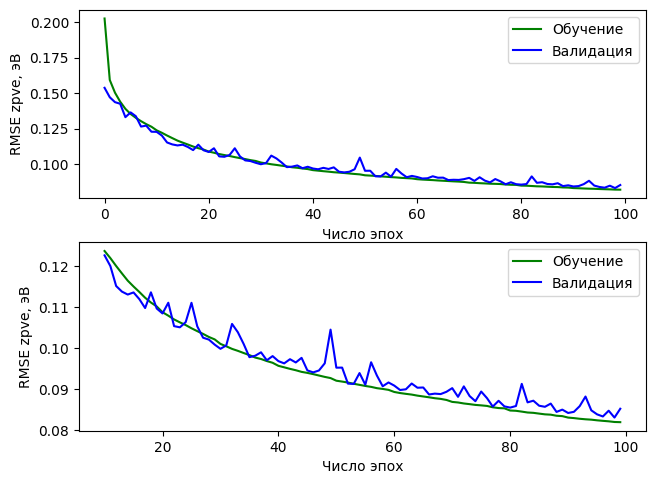